In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("PM_MF_Q_root_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        33.8636 (32.2480, 36.3053) (32.0869, 36.0505)  3.9636 (Jnode 202)\n',
 't_n104        32.1869 (30.1885, 35.0198) (30.0666, 34.8135)  4.7469 (Jnode 201)\n',
 't_n105        31.5961 (29.6106, 34.4114) (29.4541, 34.1543)  4.7003 (Jnode 200)\n',
 't_n106        29.8417 (27.8918, 32.5435) (27.7419, 32.3130)  4.5711 (Jnode 199)\n',
 't_n107        28.2696 (26.3670, 30.8530) (26.1871, 30.6008)  4.4137 (Jnode 198)\n',
 't_n108        27.4473 (25.5731, 29.9708) (25.4459, 29.7744)  4.3285 (Jnode 197)\n',
 't_n109        25.9671 (24.1375, 28.3815) (23.9884, 28.1664)  4.1780 (Jnode 196)\n',
 't_n110        25.4299 (23.6306, 27.8154) (23.4857, 27.6178)  4.1321 (Jnode 195)\n',
 't_n111        22.4456 (20.6846, 24.6592) (20.5979, 24.5345)  3.9366 (Jnode 194)\n',
 't_n112        17.6397 (15.9510, 19.6289) (15.8633, 19.5124)  3.6491 (Jnode 193)\n',
 't_n113        15.6463 (14.0252, 17.5190) (13.9414, 17.4164)  3.4750 (Jnode 192)\n',
 't_n114        14.4639 (12.8499, 16.3129) (12.7860, 1

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[33.8636,
 32.1869,
 31.5961,
 29.8417,
 28.2696,
 27.4473,
 25.9671,
 25.4299,
 22.4456,
 17.6397,
 15.6463,
 14.4639,
 11.853,
 9.0547,
 7.3302,
 10.6775,
 6.5162,
 19.2298,
 15.5981,
 15.9172,
 12.5821,
 8.1623,
 12.6352,
 21.2385,
 17.599,
 11.9387,
 22.1672,
 18.0242,
 14.8378,
 11.7037,
 14.2274,
 11.4348,
 7.0437,
 15.9485,
 18.5357,
 10.8902,
 25.0186,
 21.9779,
 19.5911,
 16.4504,
 12.2581,
 16.6922,
 13.4054,
 10.004,
 6.6725,
 22.6147,
 21.1996,
 19.0823,
 14.0325,
 28.2401,
 25.6327,
 22.7987,
 19.0466,
 24.8829,
 16.6389,
 21.6589,
 17.5555,
 27.8543,
 22.7063,
 16.8919,
 14.9098,
 12.5642,
 7.2364,
 9.3517,
 18.8002,
 12.8435,
 24.2389,
 33.194,
 31.3457,
 29.2,
 26.7284,
 24.5407,
 22.6492,
 20.7848,
 18.3228,
 14.4692,
 10.2916,
 6.3302,
 16.179,
 12.4392,
 7.9797,
 9.3072,
 19.233,
 16.6636,
 13.9333,
 10.6518,
 6.7823,
 16.6957,
 13.8722,
 9.0106,
 21.4323,
 17.7568,
 13.9054,
 9.7799,
 5.8239,
 17.2037,
 22.8044,
 17.8351,
 10.5908,
 28.066,
 20.5851]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_root_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[36.1715,
 10.8794,
 9.3678,
 7.7164,
 7.2252,
 6.1958,
 3.4456,
 3.3998,
 3.223,
 3.0417,
 2.8537,
 2.0816,
 0.8793,
 0.5052,
 1.0745,
 2.1262,
 1.6664,
 3.0118,
 2.8141,
 1.8041,
 1.4055,
 0.5257,
 1.1517,
 2.7324,
 2.4785,
 0.8283,
 3.1746,
 2.8016,
 1.8071,
 1.4889,
 1.7528,
 0.9072,
 0.6642,
 1.4501,
 5.5733,
 3.8715,
 6.4488,
 5.1918,
 3.772,
 2.9924,
 2.2534,
 2.0477,
 1.2249,
 0.5482,
 0.3916,
 4.6533,
 3.913,
 1.3616,
 0.4979,
 7.9923,
 6.2532,
 4.1311,
 1.9792,
 4.848,
 1.1164,
 3.1454,
 1.3899,
 10.0616,
 8.5317,
 5.8491,
 2.9195,
 2.4314,
 1.8839,
 1.1754,
 6.7014,
 3.2068,
 4.7711,
 8.4958,
 7.0848,
 6.3855,
 5.7993,
 5.0437,
 4.7636,
 4.457,
 4.127,
 3.6048,
 2.9461,
 1.7156,
 2.3926,
 1.3054,
 1.082,
 1.0932,
 4.0653,
 3.5372,
 3.2712,
 2.6298,
 1.3323,
 3.2434,
 2.5402,
 1.214,
 4.6845,
 4.1053,
 2.5134,
 2.2054,
 0.5416,
 1.9107,
 2.4738,
 1.856,
 0.7053,
 7.3113,
 2.9413]

In [12]:
posterior_mean_iqtree

[33.8636,
 32.1869,
 31.5961,
 29.8417,
 28.2696,
 27.4473,
 25.9671,
 25.4299,
 22.4456,
 17.6397,
 15.6463,
 14.4639,
 11.853,
 9.0547,
 7.3302,
 10.6775,
 6.5162,
 19.2298,
 15.5981,
 15.9172,
 12.5821,
 8.1623,
 12.6352,
 21.2385,
 17.599,
 11.9387,
 22.1672,
 18.0242,
 14.8378,
 11.7037,
 14.2274,
 11.4348,
 7.0437,
 15.9485,
 18.5357,
 10.8902,
 25.0186,
 21.9779,
 19.5911,
 16.4504,
 12.2581,
 16.6922,
 13.4054,
 10.004,
 6.6725,
 22.6147,
 21.1996,
 19.0823,
 14.0325,
 28.2401,
 25.6327,
 22.7987,
 19.0466,
 24.8829,
 16.6389,
 21.6589,
 17.5555,
 27.8543,
 22.7063,
 16.8919,
 14.9098,
 12.5642,
 7.2364,
 9.3517,
 18.8002,
 12.8435,
 24.2389,
 33.194,
 31.3457,
 29.2,
 26.7284,
 24.5407,
 22.6492,
 20.7848,
 18.3228,
 14.4692,
 10.2916,
 6.3302,
 16.179,
 12.4392,
 7.9797,
 9.3072,
 19.233,
 16.6636,
 13.9333,
 10.6518,
 6.7823,
 16.6957,
 13.8722,
 9.0106,
 21.4323,
 17.7568,
 13.9054,
 9.7799,
 5.8239,
 17.2037,
 22.8044,
 17.8351,
 10.5908,
 28.066,
 20.5851]

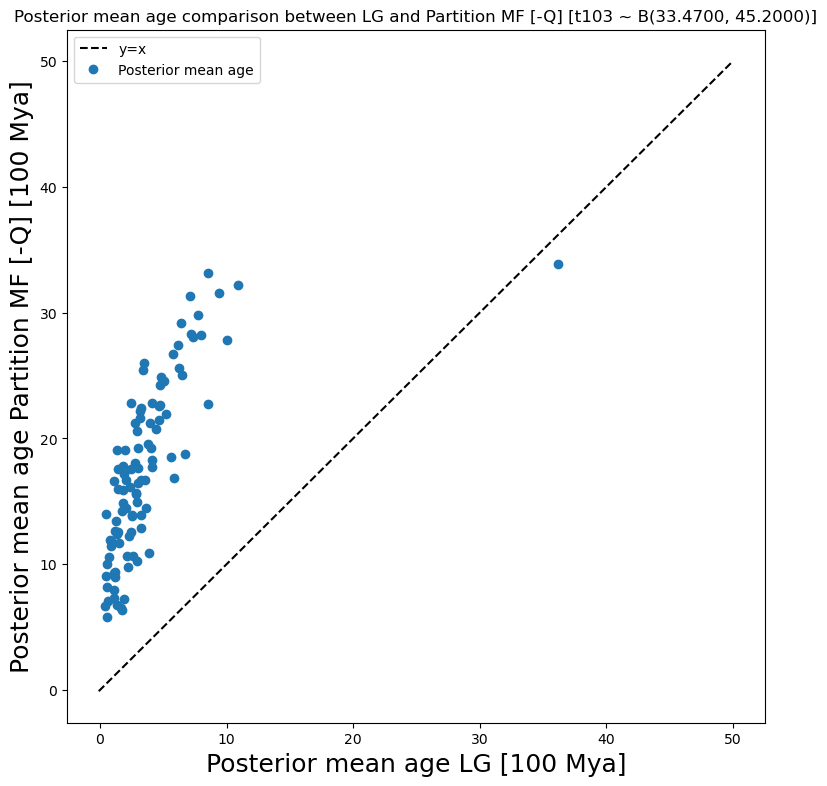

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age Partition MF [-Q] [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and Partition MF [-Q] [t103 ~ B(33.4700, 45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_partition_MF_Q_root_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')